In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
import string

data = pd.read_pickle('final cleaned data input without any embedding without punctuation without stop words without lemmatization.pkl')

In [10]:
data

,label,tweet
0,0,"[is, upset, that, he, can, t, update, his, fac..."
1,0,"[i, dived, many, times, for, the, ball, manage..."
2,0,"[my, whole, body, feels, itchy, and, like, its..."
3,0,"[no, it, s, not, behaving, at, all, i, m, mad,..."
4,0,"[not, the, whole, crew]"
...,...,...
1599994,1,"[just, woke, up, having, no, school, is, the, ..."
1599995,1,"[thewdb, com, very, cool, to, hear, old, walt,..."
1599996,1,"[are, you, ready, for, your, mojo, makeover, a..."
1599997,1,"[happy, th, birthday, to, my, boo, of, alll, t..."


# GloVe50 embedding

In [11]:
from nltk.tokenize import word_tokenize
import gensim.downloader as api

#load pretrained glove50 model
wv = api.load('glove-wiki-gigaword-50')

def get_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [wv[word] for word in tokens if word in wv]
    if not embeddings:
        return np.zeros(wv.vector_size)
    return np.mean(embeddings, axis=0)

In [12]:
# convert into numerical vals with glove50
data['embedding'] = data['tweet'].apply(lambda x: get_embedding(str(x)))

In [13]:
data.head(6)

,label,tweet,embedding
0,0,"[is, upset, that, he, can, t, update, his, fac...","[-0.03506139, 0.74029523, 0.10199339, -0.08994..."
1,0,"[i, dived, many, times, for, the, ball, manage...","[-0.04911935, 0.75016236, 0.127243, -0.0971912..."
2,0,"[my, whole, body, feels, itchy, and, like, its...","[-0.07211574, 0.75428957, 0.12795284, -0.09344..."
3,0,"[no, it, s, not, behaving, at, all, i, m, mad,...","[-0.036138035, 0.7085526, 0.10402102, -0.14649..."
4,0,"[not, the, whole, crew]","[-0.15098476, 0.799729, 0.17520997, -0.1177110..."
5,0,"[need, a, hug]","[-0.12836154, 0.82509893, 0.14203443, -0.15200..."


In [14]:
X = data['embedding']
X = np.stack(data['embedding'].values)

In [15]:
y = data['label'].to_numpy()

# Logistic Regression

Accuracy: 0.5751

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53     79812
           1       0.56      0.67      0.61     80188

    accuracy                           0.58    160000
   macro avg       0.58      0.57      0.57    160000
weighted avg       0.58      0.58      0.57    160000



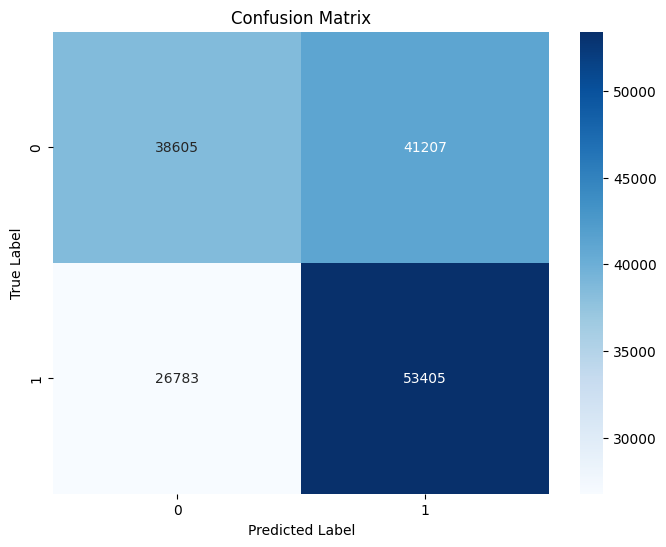

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) # No need for target_names if you're okay with numerical labels

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(data['label'].unique()), # Use unique numerical labels for x-axis
            yticklabels=sorted(data['label'].unique())) # Use unique numerical labels for y-axis
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()